In [1]:
import pandas as pd
import geoplot as gplt
import matplotlib.pyplot as plt
import descartes
import folium
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [60]:
crs = {'init':'epsg:4326'}
#epsg = 3857 used by googlemaps

In [61]:
iceland_map = gpd.read_file("../data/external/iceland_shape_6/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp")

In [62]:
df = pd.read_json('../data/raw/Saved Places.json')

In [63]:
df['features'].iloc[2]

{'geometry': {'coordinates': [7.3411604, 50.0899841], 'type': 'Point'},
 'properties': {'Google Maps URL': 'http://maps.google.com/?cid=11196889490703682575',
  'Location': {'Address': '56290 Mörsdorf, Germany',
   'Business Name': 'Geierlay Suspension Bridge',
   'Country Code': 'DE',
   'Geo Coordinates': {'Latitude': '50.0899841', 'Longitude': '7.3411604'}},
  'Published': '2020-05-21T17:04:17Z',
  'Title': 'Geierlay Suspension Bridge',
  'Updated': '2020-05-21T17:04:17Z'},
 'type': 'Feature'}

In [68]:
lat = []
long = []
name = []
for item in df['features']:
    coords = item["geometry"]
    country = item['properties']
    country_2 = country['Location']
    if 'Country Code' in country_2.keys():
        country3=country_2['Country Code']
        if coords["type"] == "Point" and country3=='IS':
            lat.append(coords['coordinates'][0])
            long.append(coords['coordinates'][1])
            name.append(country['Title'])

In [72]:
name

['Sólheimajökull glacier parking lot',
 'Secret Lagoon Hot Spring',
 'Selfoss HI Hostel',
 'Thingvellir National Park',
 'Öxarárfoss',
 'Eymundsson',
 'Svarta Kaffið',
 'Hlid Hostel',
 'Mývatn Nature Baths',
 'Hverir',
 'Rjúkandi Waterfall',
 'Vök Baths',
 'Guesthouse Elínar Helgu',
 'Beljandi Brewery',
 'Höfn HI Hostel',
 'Diamond Beach',
 'Svínafelljökull Glacier point of view',
 'Eldá Guesthouse',
 'Hrafninn Guesthouse',
 'Kolugljúfur Canyon',
 'Ölstofan',
 'Kerið',
 'Solheimasandur Plane Wreck',
 'Hálsanefshellir Cave',
 'Orkan',
 'Skúli Craft Bar',
 'Vík Hostel',
 'Friðland við Gullfoss',
 'Hlemmur Square',
 'Geysir',
 'Jökulsárlón - Glacier Lagoon | Boat Tours and Cafe']

In [74]:
lat_df = pd.DataFrame(data=lat)
long_df = pd.DataFrame(data=long)
name_df = pd.DataFrame(data=name)
df=pd.concat([lat_df,long_df,name_df],axis=1)

In [75]:
df.columns=['longitude','latitude','name']

In [76]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [77]:
df

,longitude,latitude,name
0,-19.370416,63.530431,Sólheimajökull glacier parking lot
1,-20.309351,64.137413,Secret Lagoon Hot Spring
2,-20.993864,63.936971,Selfoss HI Hostel
3,-21.129550,64.255920,Thingvellir National Park
4,-21.118298,64.265920,Öxarárfoss
5,-21.938231,64.147522,Eymundsson
6,-21.923427,64.144499,Svarta Kaffið
7,-16.918065,65.649192,Hlid Hostel
8,-16.847968,65.630899,Mývatn Nature Baths
9,-16.809311,65.640914,Hverir


In [78]:
geo_df = gpd.GeoDataFrame(df, crs=crs,geometry=geometry)

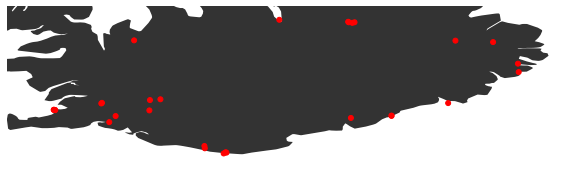

In [15]:
fig,ax = plt.subplots(figsize=(10,20))
iceland_map.plot(ax=ax, alpha=.8, color='black')
gplt.pointplot(geo_df,ax=ax,color='red',)

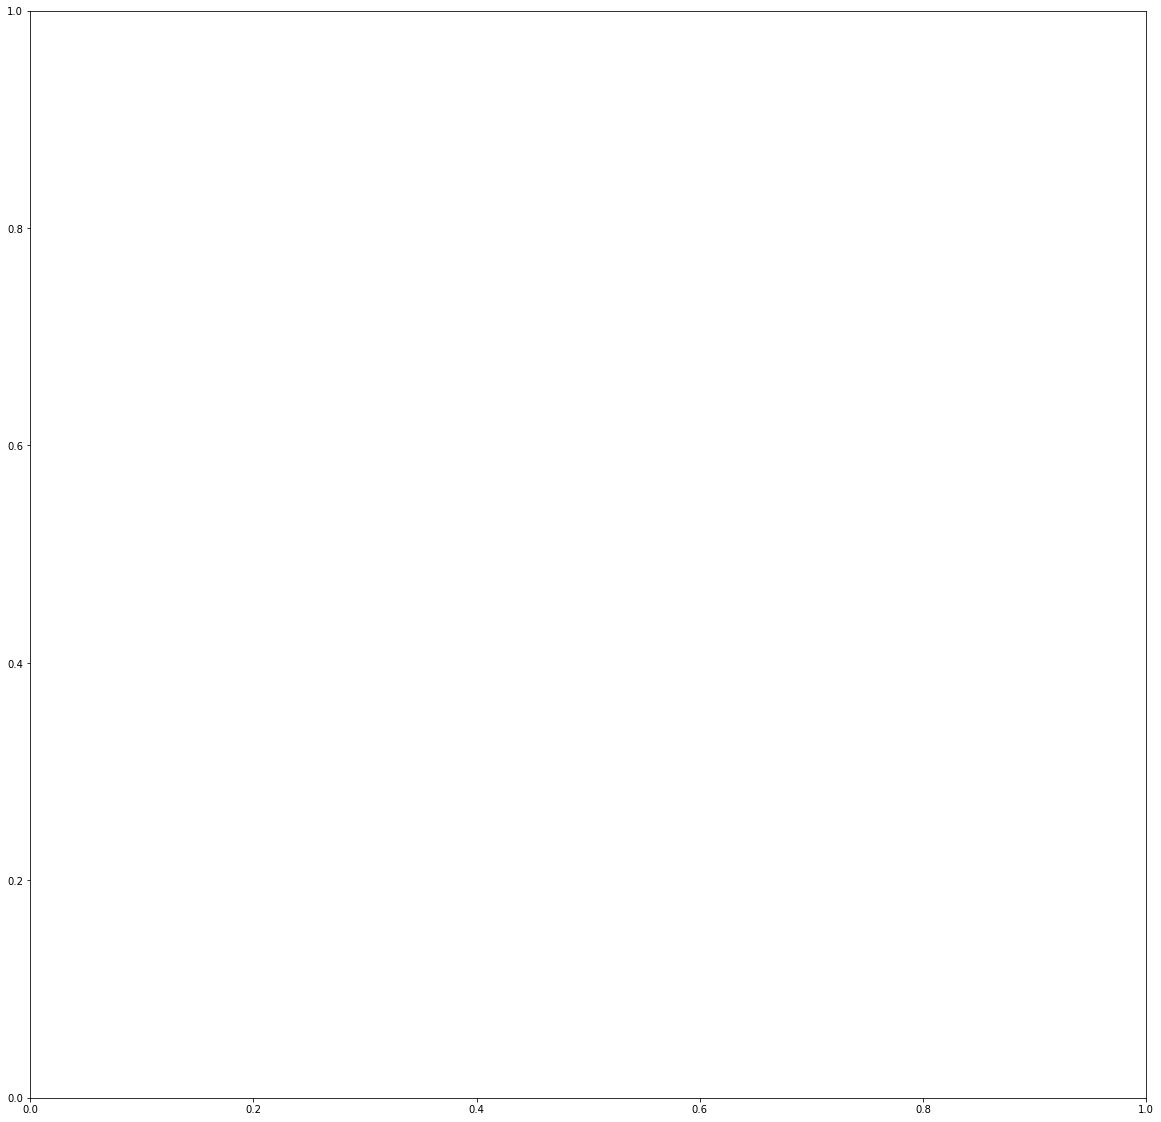

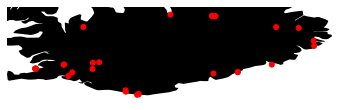

In [16]:
#fig, ax = plt.subplots(figsize=(20,20))
fig, ax = plt.subplots(figsize=(20,20))
ax = iceland_map.plot(color='black')
gplt.pointplot(geo_df,color='red',ax=ax)

#lt.show()

In [17]:
test_gdf = gpd.sjoin(geo_df,iceland_map,op='intersects')

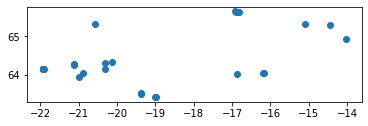

In [18]:
test_gdf.plot()

In [22]:
eiffel_tower = folium.Map(location=[48.8583736,2.2922926],zoom_start=12)

In [23]:
display(eiffel_tower)

In [25]:
iceland_map

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."
...,...,...,...
246,247,Western Samoa,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
247,248,Swaziland,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."
248,249,Yemen,"MULTIPOLYGON (((48.68639 14.03750, 48.61000 14..."
249,250,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."


In [79]:
geo_df

,longitude,latitude,name,geometry
0,-19.370416,63.530431,Sólheimajökull glacier parking lot,POINT (-19.37042 63.53043)
1,-20.309351,64.137413,Secret Lagoon Hot Spring,POINT (-20.30935 64.13741)
2,-20.993864,63.936971,Selfoss HI Hostel,POINT (-20.99386 63.93697)
3,-21.129550,64.255920,Thingvellir National Park,POINT (-21.12955 64.25592)
4,-21.118298,64.265920,Öxarárfoss,POINT (-21.11830 64.26592)
5,-21.938231,64.147522,Eymundsson,POINT (-21.93823 64.14752)
6,-21.923427,64.144499,Svarta Kaffið,POINT (-21.92343 64.14450)
7,-16.918065,65.649192,Hlid Hostel,POINT (-16.91807 65.64919)
8,-16.847968,65.630899,Mývatn Nature Baths,POINT (-16.84797 65.63090)
9,-16.809311,65.640914,Hverir,POINT (-16.80931 65.64091)


In [43]:
iceland_center = geo_df.geometry[0]

In [44]:
iceland_location = [iceland_center.y, iceland_center.x]

In [45]:
test_map = folium.Map(location=iceland_location)

In [46]:
display(test_map)

In [50]:
for row in geo_df.iterrows():
    row_val = row[1]
    location = [row_val['latitude'],row_val['longitude']]
    marker = folium.Marker(location=location)
    marker.add_to(test_map)

In [59]:
display(test_map)

In [80]:
for row in geo_df.iterrows():
    row_val = row[1]
    location = [row_val['latitude'],row_val['longitude']]
    popup = popup = '<strong>' + row_val['name'] +'</strong>'
    marker = folium.Marker(location=location,popup=popup)
    marker.add_to(test_map)

In [81]:
display(test_map)